# Autoencoder

In [1]:
#Variable 
import matplotlib.pyplot as plt

import pickle
import numpy as np
import os
import cv2
from tqdm import tqdm
import tensorflow.keras as keras
from keras import layers
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import sys
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np
from tensorflow.python.ops.variables import trainable_variables

from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np
from tensorflow.python.ops.variables import trainable_variables
from sklearn.model_selection import train_test_split

import pathlib

import seaborn as sns
import tensorflow as tf
import pandas as pd                     

from IPython import display

CATEGORIES = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","nn","o","p","q","r","s","t","u","v","w","x","y","z"]

In [4]:
#cargando data
#Para cargar los datos
pickle_in = open("Xfusion","rb")
X = pickle.load(pickle_in)
pickle_in = open("yfusion","rb")
y = pickle.load(pickle_in)

X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.33, shuffle = True)




In [5]:
height, width, depth = 60, 60, 1 
num_classes = 27 
num_train = 32495
num_test = 16006

X_train = X_train.reshape(num_train, height * width)
X_test = X_test.reshape(num_test, height * width)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range


Y_train = np_utils.to_categorical(Y_train, num_classes) 
Y_test2 = Y_test
Y_test = np_utils.to_categorical(Y_test, num_classes) 


In [6]:
print(Y_train.shape)

(32495, 27)


In [22]:
#Definir capas, creacion y entrenamiento del modelo

input_img = Input(shape=(height * width,))

x = Dense(height * width, activation='relu')(input_img) #Capa de entrada
encoded = Dense(2500, activation='relu')(x) #Capa encoder
decoded = Dense(height * width, activation='sigmoid')(encoded) #capa decoder

autoencoder = Model(input_img, decoded) #Modelo Autoencoer
encoder = Model(input_img, encoded) #Modelo solo Encoder

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
      epochs=5,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, X_test))

reduced_representation =encoder.predict(X_test)



Epoch 1/5
254/254 [==============================] - 69s 271ms/step - loss: 0.5736 - val_loss: 0.5560
Epoch 2/5
254/254 [==============================] - 69s 272ms/step - loss: 0.5533 - val_loss: 0.5496
Epoch 3/5
254/254 [==============================] - 62s 243ms/step - loss: 0.5487 - val_loss: 0.5467
Epoch 4/5
254/254 [==============================] - 70s 275ms/step - loss: 0.5465 - val_loss: 0.5446
Epoch 5/5
254/254 [==============================] - 65s 257ms/step - loss: 0.5449 - val_loss: 0.5439


In [8]:
#Creacion del modelo Autoencoder mas la capa de clasificacion
out2 = Dense(num_classes, activation='softmax')(autoencoder.output)
newmodel = Model(autoencoder.input,out2)

newmodel.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 

#Entrenamiento del modelo AE + clasificacion
history = newmodel.fit(X_train, Y_train,
      epochs=8,
      batch_size=64,
      shuffle=True,
      validation_data=(X_test, Y_test))

#Evaluacion del modelo 
scores = newmodel.evaluate(X_test, Y_test, verbose=1) 
print("Accuracy: ", scores[1])
 
 

Epoch 1/8
508/508 [==============================] - 85s 166ms/step - loss: 1.5863 - accuracy: 0.4332 - val_loss: 1.0911 - val_accuracy: 0.6028
Epoch 2/8
508/508 [==============================] - 83s 164ms/step - loss: 0.9424 - accuracy: 0.6447 - val_loss: 0.8290 - val_accuracy: 0.6861
Epoch 3/8
508/508 [==============================] - 84s 165ms/step - loss: 0.7151 - accuracy: 0.7330 - val_loss: 0.6201 - val_accuracy: 0.7681
Epoch 4/8
508/508 [==============================] - 85s 168ms/step - loss: 0.5466 - accuracy: 0.7957 - val_loss: 0.4820 - val_accuracy: 0.8190
Epoch 5/8
508/508 [==============================] - 86s 170ms/step - loss: 0.4721 - accuracy: 0.8235 - val_loss: 0.4869 - val_accuracy: 0.8198
Epoch 6/8
508/508 [==============================] - 84s 166ms/step - loss: 0.3919 - accuracy: 0.8523 - val_loss: 0.4343 - val_accuracy: 0.8422
Epoch 7/8
508/508 [==============================] - 73s 145ms/step - loss: 0.3543 - accuracy: 0.8659 - val_loss: 0.3549 - val_accuracy:

In [9]:
print("Modelo Autoencoder")
autoencoder.summary()


Modelo Autoencoder
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3600)]            0         
                                                                 
 dense (Dense)               (None, 3600)              12963600  
                                                                 
 dense_1 (Dense)             (None, 2500)              9002500   
                                                                 
 dense_2 (Dense)             (None, 3600)              9003600   
                                                                 
Total params: 30,969,700
Trainable params: 30,969,700
Non-trainable params: 0
_________________________________________________________________


In [10]:
print("Modelo Autoencoder mas capa de clasificacion")
newmodel.summary()

Modelo Autoencoder mas capa de clasificacion
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3600)]            0         
                                                                 
 dense (Dense)               (None, 3600)              12963600  
                                                                 
 dense_1 (Dense)             (None, 2500)              9002500   
                                                                 
 dense_2 (Dense)             (None, 3600)              9003600   
                                                                 
 dense_3 (Dense)             (None, 27)                97227     
                                                                 
Total params: 31,066,927
Trainable params: 31,066,927
Non-trainable params: 0
_________________________________________________________________


# Ejemplos de las predicciones

In [25]:
ress = newmodel.predict(X_test)

La seña es: d


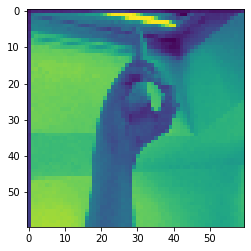

In [26]:
#Ejemplo de el resultado de una prediccion
numero = 5
plt.imshow(X_test[numero].reshape(60, 60))
print("La seña es:",CATEGORIES[np.argmax(ress[numero])] )


In [27]:
img_autoencoder = autoencoder.predict(X_test)

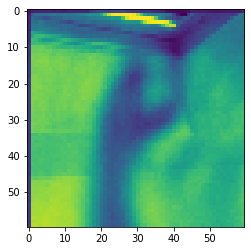

In [28]:
#Ejemplo de la reconstruccion realizada por el autoencoder
plt.imshow(img_autoencoder[numero].reshape(60, 60))

In [29]:
reduced_representation =encoder.predict(X_test)

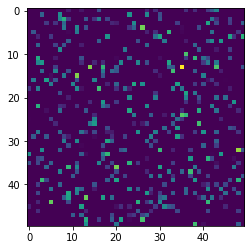

In [38]:
#Representacion reducida creada por el Encoder
plt.imshow(reduced_representation[1].reshape(50, 50))

# Graficos y matriz de confusion


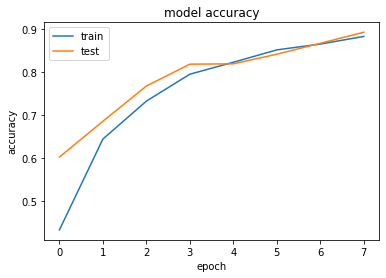

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

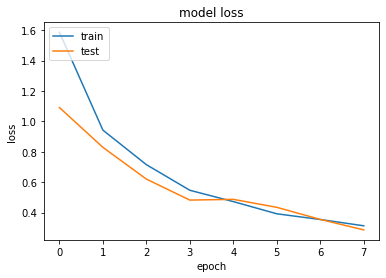

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

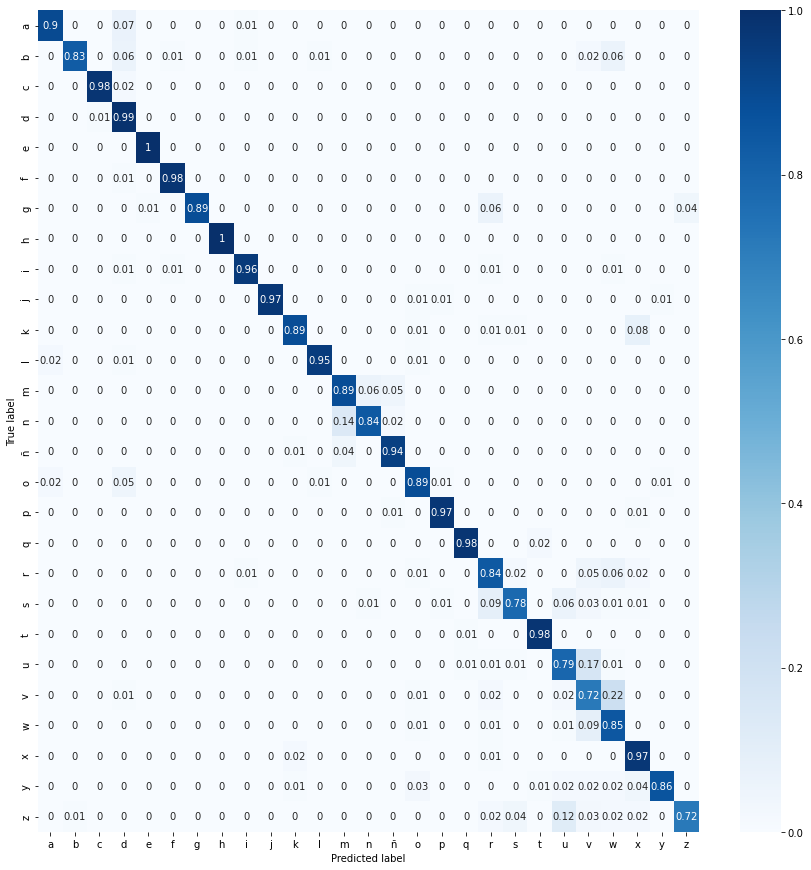

In [36]:
classes=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","ñ","o","p","q","r","s","t","u","v","w","x","y","z"]
con_mat = tf.math.confusion_matrix(labels=Y_test2, predictions=prediccionTest).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(12, 12))

sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()